In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import numpy as np

In [54]:
df=pd.read_csv("salaries.csv")

In [55]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [56]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [57]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:xlabel='rank', ylabel='salary'>

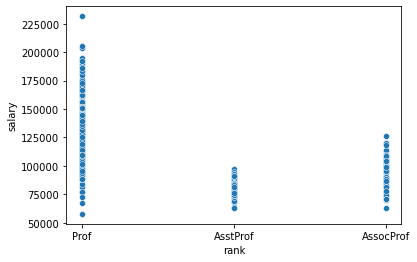

In [58]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

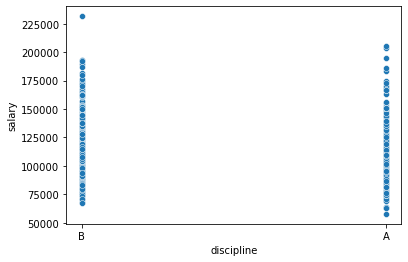

In [59]:
sns.scatterplot(x='discipline',y='salary',data=df)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

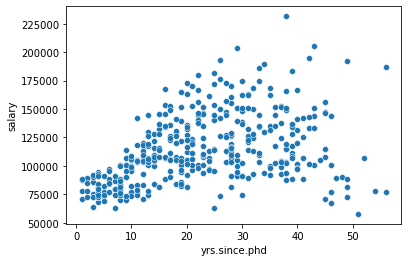

In [60]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

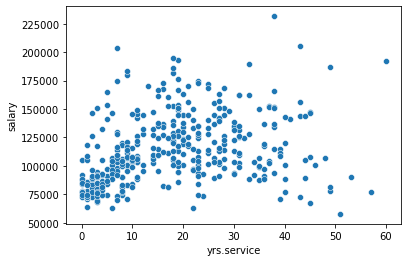

In [61]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

In [62]:
le=LabelEncoder()
list1=['rank','sex','discipline']
for val in list1:
    df[val]=le.fit_transform(df[val])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [63]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

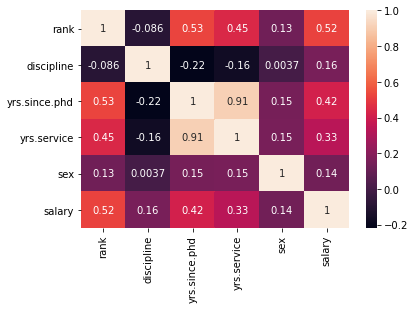

In [64]:
sns.heatmap(df.corr(),annot=True)

In [65]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


<AxesSubplot:>

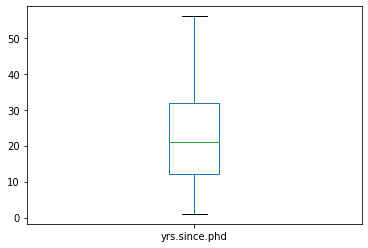

In [67]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

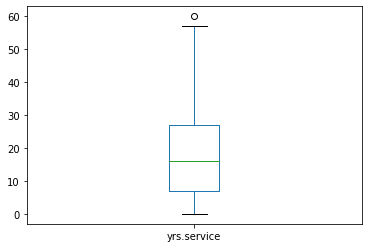

In [68]:
df['yrs.service'].plot.box()

In [69]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [70]:
import numpy as np


In [71]:
df.drop(['sex','discipline'],axis=1,inplace=True)

since 'sex' and discipline has to do almost nothing with the salary so we are droping it

In [72]:
df

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500
...,...,...,...,...
392,2,33,30,103106
393,2,31,19,150564
394,2,42,25,101738
395,2,25,15,95329


In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(397, 4)

In [74]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [75]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(393, 4)

In [76]:
lr=LinearRegression()

In [77]:
lr.fit(x_train,y_train)

LinearRegression()

In [78]:
lr.score(x_train,y_train)

0.1949039625788217

In [79]:
x=new_df.iloc[:,1:3]
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [80]:
y=new_df.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [81]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"at random state{i}, the testing scoree is:-{r2_score(y_test,pred_test)}")
    print("\n")

at random state 0, the training accuracy is:- 0.1949039625788217
at random state0, the testing scoree is:-0.1817066884265548


at random state 1, the training accuracy is:- 0.1797887112515817
at random state1, the testing scoree is:-0.23236984125338578


at random state 2, the training accuracy is:- 0.17823329094291185
at random state2, the testing scoree is:-0.2579176204691541


at random state 3, the training accuracy is:- 0.1978948992918238
at random state3, the testing scoree is:-0.16791309949052147


at random state 4, the training accuracy is:- 0.21014929700554064
at random state4, the testing scoree is:-0.0968725117622602


at random state 5, the training accuracy is:- 0.16689281863787608
at random state5, the testing scoree is:-0.2885171203509864


at random state 6, the training accuracy is:- 0.1969982007453348
at random state6, the testing scoree is:-0.1540496856638277


at random state 7, the training accuracy is:- 0.18382732346156827
at random state7, the testing scoree is:

at random state 64, the training accuracy is:- 0.18283929410026523
at random state64, the testing scoree is:-0.22416272099573276


at random state 65, the training accuracy is:- 0.2072971820149917
at random state65, the testing scoree is:-0.11523342940132986


at random state 66, the training accuracy is:- 0.16512421047882675
at random state66, the testing scoree is:-0.2841694391121298


at random state 67, the training accuracy is:- 0.23345305156462837
at random state67, the testing scoree is:--0.012254549700603468


at random state 68, the training accuracy is:- 0.23881734855019543
at random state68, the testing scoree is:-0.018608639433561724


at random state 69, the training accuracy is:- 0.18704777284012952
at random state69, the testing scoree is:-0.20956199296299505


at random state 70, the training accuracy is:- 0.20457605877066232
at random state70, the testing scoree is:-0.1406487621572997


at random state 71, the training accuracy is:- 0.18473515889743597
at random state7

In [82]:
x_train.shape

(314, 2)

In [83]:
y_train.shape

(314,)

In [84]:
x_test.shape

(79, 2)

In [85]:
y_test.shape

(79,)

In [86]:
new_df.columns

Index(['rank', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

at random state 0, the training accuracy is:- 0.1949039625788217
at random state0, the testing scoree is:-0.1817066884265548


at random state 1, the training accuracy is:- 0.1797887112515817
at random state1, the testing scoree is:-0.23236984125338578


at random state 2, the training accuracy is:- 0.17823329094291185
at random state2, the testing scoree is:-0.2579176204691541


at random state 3, the training accuracy is:- 0.1978948992918238
at random state3, the testing scoree is:-0.16791309949052147


at random state 4, the training accuracy is:- 0.21014929700554064
at random state4, the testing scoree is:-0.0968725117622602


at random state 5, the training accuracy is:- 0.16689281863787608
at random state5, the testing scoree is:-0.2885171203509864


at random state 6, the training accuracy is:- 0.1969982007453348
at random state6, the testing scoree is:-0.1540496856638277


at random state 7, the training accuracy is:- 0.18382732346156827
at random state7, the testing scoree is:

at random state 69, the training accuracy is:- 0.18704777284012952
at random state69, the testing scoree is:-0.20956199296299505


at random state 70, the training accuracy is:- 0.20457605877066232
at random state70, the testing scoree is:-0.1406487621572997


at random state 71, the training accuracy is:- 0.18473515889743597
at random state71, the testing scoree is:-0.18245920875611743


at random state 72, the training accuracy is:- 0.2450967841929118
at random state72, the testing scoree is:--0.03786712281502114


at random state 73, the training accuracy is:- 0.15752944154674964
at random state73, the testing scoree is:-0.29835960283256013


at random state 74, the training accuracy is:- 0.2064649933571262
at random state74, the testing scoree is:-0.11805572833756217


at random state 75, the training accuracy is:- 0.19581048299838621
at random state75, the testing scoree is:-0.1664245260043482


at random state 76, the training accuracy is:- 0.20993593056681314
at random state76, 

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [89]:
lr.coef_

array([1630.41116542, -888.56309478])

In [90]:
from sklearn.linear_model import Lasso,Ridge

In [91]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.17823329094291185

In [92]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)


0.17823329094291185

In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
en=ElasticNet(alpha=0.0001)
en.fit(x_train,y_train)
en.pred=en.predict(x_test)
print(en.score(x_train,y_train))
en.coef_


0.17823329094248586


array([1478.92525344, -587.14527995])

In [95]:
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)

In [96]:
print(r2_score(y_test,pred_test))

0.2736006523775769


In [97]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)


In [98]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is {cv_mean} and accuracy score for training is{train_accuracy} and accuracy for the testing is{test_accuracy}")
print("/n")

at cross fold 2 the cv score is 0.14490875353414345 and accuracy score for training is0.17300914190161776 and accuracy for the testing is0.2736006523775769
at cross fold 3 the cv score is 0.16084502563972738 and accuracy score for training is0.17300914190161776 and accuracy for the testing is0.2736006523775769
at cross fold 4 the cv score is 0.16239223175233422 and accuracy score for training is0.17300914190161776 and accuracy for the testing is0.2736006523775769
at cross fold 5 the cv score is 0.13291405712446575 and accuracy score for training is0.17300914190161776 and accuracy for the testing is0.2736006523775769
at cross fold 6 the cv score is 0.14997266733349487 and accuracy score for training is0.17300914190161776 and accuracy for the testing is0.2736006523775769
at cross fold 7 the cv score is 0.1300474690253465 and accuracy score for training is0.17300914190161776 and accuracy for the testing is0.2736006523775769
at cross fold 8 the cv score is 0.1513026357129939 and accuracy s

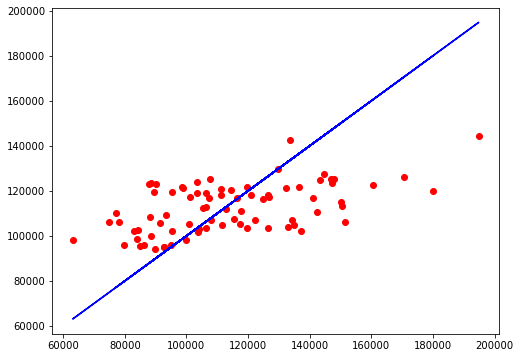

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.plot(y_test,y_test,color="b")
plt.title=("linear regression")
plt.show()


In [106]:
import pickle
filename='salaries.pkl'
pickle.dump(lr,open(filename,'wb'))